In [2]:
from __future__ import print_function
#from fenics import *
import dolfin as dl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# 1D Poisson Example

In [12]:
# Create mesh and define function space
mesh = dl.UnitIntervalMesh(8)
V = dl.FunctionSpace(mesh, 'P', 1)

# Define boundary condition
#u_D = dl.Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)
#try a simpler one
u_D = dl.Expression('1  + 3*x[0]*x[0]', degree=2)
def left_boundary(x, on_boundary):
    if on_boundary and np.abs(x - 0.0) < 1e-8:
        return True
    else:
        return False
def right_boundary(x, on_boundary):
    if on_boundary and np.abs(x - 1.0) < 1e-8:
        return True
    else:
        return False    

bc_left = dl.DirichletBC(V, u_D, left_boundary)
bc_right = dl.DirichletBC(V,u_D,right_boundary)

# Define variational problem
u = dl.TrialFunction(V)
v = dl.TestFunction(V)
f = dl.Constant(-6.0)

a = dl.dot(dl.grad(u), dl.grad(v))*dl.dx
L = f*v*dl.dx


#construct matrices and see how applying boundaries works
K = dl.assemble(a)
b = dl.assemble(L)

print('Before BC')
print(b[:])
print(K.array())

#apply left boundary
print('Left BC applied')
bc_left.apply(K)
bc_left.apply(b)
print(b[:])
print(K.array())


#apply right boundary
print('Right BC applied')
bc_right.apply(K)
bc_right.apply(b)
print(b[:])
print(K.array())

Before BC
[-0.375 -0.75  -0.75  -0.75  -0.75  -0.75  -0.75  -0.75  -0.375]
[[  8.  -8.   0.   0.   0.   0.   0.   0.   0.]
 [ -8.  16.  -8.   0.   0.   0.   0.   0.   0.]
 [  0.  -8.  16.  -8.   0.   0.   0.   0.   0.]
 [  0.   0.  -8.  16.  -8.   0.   0.   0.   0.]
 [  0.   0.   0.  -8.  16.  -8.   0.   0.   0.]
 [  0.   0.   0.   0.  -8.  16.  -8.   0.   0.]
 [  0.   0.   0.   0.   0.  -8.  16.  -8.   0.]
 [  0.   0.   0.   0.   0.   0.  -8.  16.  -8.]
 [  0.   0.   0.   0.   0.   0.   0.  -8.   8.]]
Left BC applied
[-0.375 -0.75  -0.75  -0.75  -0.75  -0.75  -0.75  -0.75   1.   ]
[[  8.  -8.   0.   0.   0.   0.   0.   0.   0.]
 [ -8.  16.  -8.   0.   0.   0.   0.   0.   0.]
 [  0.  -8.  16.  -8.   0.   0.   0.   0.   0.]
 [  0.   0.  -8.  16.  -8.   0.   0.   0.   0.]
 [  0.   0.   0.  -8.  16.  -8.   0.   0.   0.]
 [  0.   0.   0.   0.  -8.  16.  -8.   0.   0.]
 [  0.   0.   0.   0.   0.  -8.  16.  -8.   0.]
 [  0.   0.   0.   0.   0.   0.  -8.  16.  -8.]
 [  0.   0.   0.   0.   0. 

In [13]:
#see if there is discrepancy between numpy solve and fenics
np_u = np.linalg.solve(np.array(K.array()),np.array(b))
print(np_u)

[ 4.        3.296875  2.6875    2.171875  1.75      1.421875  1.1875
  1.046875  1.      ]


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
error_L2  = 0.00855816496101859
error_max = 8.881784197e-16


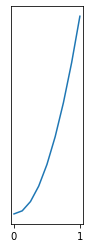

[ 4.        3.296875  2.6875    2.171875  1.75      1.421875  1.1875
  1.046875  1.      ]


In [16]:
# Compute solution
u = dl.Function(V)
dl.solve(K, u.vector(), b)

# Plot solution and mesh
dl.plot(u)
dl.plot(mesh)
#plt.colorbar(cm)
# Save solution to file in VTK format
#vtkfile = File('poisson/solution.pvd')
#vtkfile << u

# Compute error in L2 norm
error_L2 = dl.errornorm(u_D, u, 'L2')

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)

error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Print errors
print('error_L2  =', error_L2)
print('error_max =', error_max)

# Hold plot
#interactive()
plt.show()
print(u.vector()[:])

# Poisson 2D Example


In [18]:
# Create mesh and define function space
mesh = dl.UnitSquareMesh(4, 4)
V = dl.FunctionSpace(mesh, 'P', 1)

# Define boundary condition
#u_D = dl.Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)
#try a simpler one
u_D = dl.Expression('1  + 3*x[1]*x[1]', degree=2)
def boundary(x, on_boundary):
    return on_boundary
bc = dl.DirichletBC(V, u_D, boundary)
# Define variational problem
u = dl.TrialFunction(V)
v = dl.TestFunction(V)
f = dl.Constant(-6.0)
a = dl.dot(dl.grad(u), dl.grad(v))*dl.dx
L = f*v*dl.dx

#Assemble explicitly and see what boundary conditions do
#construct matrices and see how applying boundaries works
K = dl.assemble(a)
b = dl.assemble(L)

print('Before BC')
print(b[:])
print(K.array())

#apply boundary
print('BC applied')
bc.apply(K)
bc.apply(b)
print(b[:])
print(K.array())




Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Before BC
[-0.0625 -0.1875 -0.1875 -0.1875 -0.375  -0.1875 -0.1875 -0.375  -0.375
 -0.1875 -0.125  -0.375  -0.375  -0.375  -0.125  -0.1875 -0.375  -0.375
 -0.1875 -0.1875 -0.375  -0.1875 -0.1875 -0.1875 -0.0625]
[[ 1.  -0.5 -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.5  2.   0.  -0.5 -1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.5  0.   2.   0.  -1.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -0.5  0.   2.   0.   0.  -0.5 -1.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -1.  -1.   0.   4.   0.   0.  -1.  -1.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0. 

In [19]:
#see if there is difference between numpy and fenics solve
np_u = np.linalg.solve(np.array(K.array()),np.array(b))
print(np_u)

[ 4.      2.6875  4.      1.75    2.6875  4.      1.1875  1.75    2.6875
  4.      1.      1.1875  1.75    2.6875  4.      1.      1.1875  1.75
  2.6875  1.      1.1875  1.75    1.      1.1875  1.    ]


error_L2  = 0.034232659844072956
error_max = 2.22044604925e-16


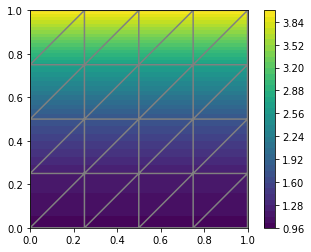

[ 4.      2.6875  4.      1.75    2.6875  4.      1.1875  1.75    2.6875
  4.      1.      1.1875  1.75    2.6875  4.      1.      1.1875  1.75
  2.6875  1.      1.1875  1.75    1.      1.1875  1.    ]


In [20]:
# Compute solution
u = dl.Function(V)
# Compute solution
u = dl.Function(V)
dl.solve(K, u.vector(), b)


# Plot solution and mesh
cm=dl.plot(u)
dl.plot(mesh)
plt.colorbar(cm)
# Save solution to file in VTK format
#vtkfile = File('poisson/solution.pvd')
#vtkfile << u

# Compute error in L2 norm
error_L2 = dl.errornorm(u_D, u, 'L2')

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)

error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Print errors
print('error_L2  =', error_L2)
print('error_max =', error_max)

# Hold plot
#interactive()
plt.show()
print(u.vector()[:])

[ 0.  0.  0.  0.  0.]
